# Evolution du prix du gazole

##### Auteurs : Mickaël Canhoto (L2 Informatique), Achille Gravouil (L1 Informatique)

*Notre projet consiste à étudier et traiter l'évolution du prix moyen par mois du gazole de 1992 à aujourd'hui.*

### Sommaire

 1. [Introduction](#Introduction)
 2. [Importation des modules](#Importation-des-modules)
 3. [Collecte des données](#Collecte-des-donnees)
 4. [Traitement des données](#Traitement-des-donnees)
 5. [Représentation graphique](#Representation-graphique)
 6. [Conclusion](#Conclusion)

## Introduction

Suite à la situation tendu en Europe et la hausse des prix du gazole, nous avons décidé d'étudier les variations du prix du gazole sur les 30 dernières années. 
Cette étude a pour objectif d'étudier l'évolution du prix afin de crée une représentation graphique et d'étudier celle-ci.

Pour cela nous essaieront de représenter le plus fidélement et le plus explicitement, les données receuillis durant ce projet.
Nous verront donc comment le prix à évolué et nous esssaieront d'anticiper le(s) futur(s) mouvement possible grâce à une fonction

**Pour cela nous nous aiderons des informations recuellis par l'[INSEE](https://www.insee.fr/fr/statistiques/serie/000442588#Tableau)**

## Importation des modules


Nous allons utilisés les modules suivants : 
1. Pandas (importation des données)
2. Plotly

In [94]:
import pandas as pd
import plotly as pl
import numpy as np
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Collecte des données

 * Les données proviennent du site de l'[INSEE](https://www.insee.fr/fr/statistiques/serie/000442588#Tableau). Elle nous présentes le prix moyens mensuels de vente du litre de Gazole en métrople Française de 1992 a 2022.
 
<u>NB :</u> Le fichier contenant les données devra accompagner le notebook.

In [99]:
data = pd.read_excel (r'./data/mesures.xlsx', skiprows=4) #importe les données depuis le fichier excel
data = np.flipud(data)
df = pd.DataFrame(data, columns = ['Période', 'Prix'])

#affichage
print(df)

     Période  Prix
0    1992-01  0.54
1    1992-02  0.54
2    1992-03  0.54
3    1992-04  0.53
4    1992-05  0.54
..       ...   ...
356  2021-09  1.46
357  2021-10  1.56
358  2021-11  1.57
359  2021-12  1.54
360  2022-01  1.63

[361 rows x 2 columns]


## Traitement des données

Une transformation des données, calculs,... sont attendus. Tout les traitements devront être réalisés dans cette partie. Les données de sorties constitueront les valeurs à représenter directement.

*Le traitement mathématique principal devra être brièvement détaillé.*

<u>Exemple :</u> La méthode des moindres carrés

La régression linéaire consiste à chercher les paramètres $a$ et $b$ définissant la droite $y=ax+b$ qui passe au plus près d'un ensemble de points $(x_k,y_k)$. Les paramètres $a$ et $b$ sont déterminés par la méthodes des moindres carrés qui consiste, dans le cas d'une régression linéaire, à minimiser la quantité :

\begin{equation}
    Q(a, b) = \sum_{k=1}^N (y_k - a x_k - b)^2
\end{equation}

<AxesSubplot:xlabel='Période', ylabel='Prix'>

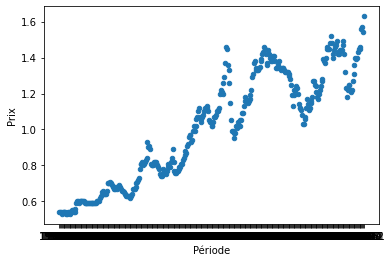

In [101]:
df.plot.scatter(y="Prix", x="Période")


## Représentation graphique

 * 1 figure max.
 * Analyse, discussion => <u>Longueur :</u> 5-10 lignes

In [12]:
import pandas as pd
import numpy as np
import holoviews as hv
import panel as pn

from bokeh.sampledata import gapminder
from holoviews import dim, opts

renderer = hv.renderer('bokeh')

# Declare dataset
fertility = gapminder.fertility.reset_index().melt(id_vars='Country', var_name='Year', value_name='Fertility')
population = gapminder.population.reset_index().melt(id_vars='Country', var_name='Year', value_name='Population')
life_expectancy = gapminder.life_expectancy.reset_index().melt(id_vars='Country', var_name='Year', value_name='Life Expectancy')
gapminder_df = pd.merge(pd.merge(pd.merge(fertility, population), life_expectancy), gapminder.regions, on='Country')
gapminder_df.Year = gapminder_df.Year.astype('int')
ds = hv.Dataset(gapminder_df)

# Apply dimension labels and ranges
kdims = ['Fertility', 'Life Expectancy']
vdims = ['Country', 'Population', 'Group']
dimensions = {
    'Fertility' : dict(label='Children per woman (total fertility)', range=(0, 10)),
    'Life Expectancy': dict(label='Life expectancy at birth (years)', range=(15, 100)),
    'Population': ('population', 'Population')
}

# Create Points plotting fertility vs life expectancy indexed by Year
gapminder_ds = ds.redim(**dimensions).to(hv.Points, kdims, vdims, 'Year')

# Define annotations
text = gapminder_ds.clone({yr: hv.Text(1.2, 25, str(int(yr)), fontsize=30)
                           for yr in gapminder_ds.keys()})

# Define options
# Combine Points and Text
hvgapminder = (gapminder_ds * text).opts(
    opts.Points(alpha=0.6, color='Group', cmap='Set1', line_color='black', 
                size=np.sqrt(dim('Population'))*0.005, 
                tools=['hover'], title='Gapminder Demo', responsive=True,
                show_grid=True),
    opts.Text(text_font_size='52pt', text_color='lightgray')
)

# Define custom widgets
def animate_update():
    year = slider.value + 1
    if year > end:
        year = int(start)
    slider.value = year

# Update the holoviews plot by calling update with the new year.
def slider_update(event):
    hvplot.update((event.new,))

def animate(event):
    if button.name == '► Play':
        button.name = '❚❚ Pause'
        callback.start()
    else:
        button.name = '► Play'
        callback.stop()

start, end = ds.range('Year')
slider = pn.widgets.IntSlider(start=int(start), end=int(end), value=int(start), name="Year")
slider.param.watch(slider_update, 'value')

button = pn.widgets.Button(name='► Play', width=60, align='end')
button.on_click(animate)
callback = button.add_periodic_callback(animate_update, 200, start=False)

# Get HoloViews plot and attach document
hvplot = renderer.get_plot(hvgapminder)
hvplot.update((1964,))

# Create a Panel layout and make it servable
pn.Column(
    hvplot.state,
    pn.Row(slider, button),
    sizing_mode='stretch_both'
).servable('Gapminder Demo')


RuntimeError: bokeh sample data directory does not exist, please execute bokeh.sampledata.download()

## Conclusion

 * Conclusions
 * Perspectives